## Нагадування по Markdown

Надаємо невелике нагадування записів в
[Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (LaTeX):

Markdown | Preview
--- | ---
`**bold text**` | **bold text**
 \\$\frac{x}{y}\\$ | $\frac{x}{y}$
 \\$p^{x}_{y}\\$ | $p^{x}_{y}$
\\$x \cdot y\\$ | $x \cdot y$
\\$\sqrt{x}\\$ | $\sqrt{x}$
\\$\pi\\$ | $\pi$
\\$\approx\\$ | $\approx$

І ще декілька прикладів:

```markdown
$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
```

$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

 ---

# Завдання Методи прийняття рішень

## Частина 1. Аналіз та підготовка даних

Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.

Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.

За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

## Частина 2. Моделювання

Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Rent”

Оціни якість моделей як мінімум за 2 метриками.

## Частина 3. Аналіз результатів

Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних.

Зроби висновки, на яких прикладах кожна модель більше помиляється.

Зроби порівняння якості моделей. Напиши висновки.

## Додаткові питання:
Проаналізуй ознаки на мультиколінеарність (Variance inflation factor).

Знайди оптимальні значення параметрів моделей, наприклад, за допомогою алгоритму GridSearch.

Проаналізуй важливість ознак (feature importance).

Побудуй графік залишків (residuals plot).

---
Розв'язання:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

rent_df = pd.read_csv("./sample_data/House_Rent_Dataset.csv", encoding='utf-8')

print('приклади даних з БД:')
print(rent_df.sample(5))
print('-'*50)
print('Форма даних:')
print(rent_df.shape)
print('-'*50)
print('Назви даних:')
print(rent_df.columns)
print('-'*50)
print('Типи даних:')
print(rent_df.info())
print('-'*50)
print('Статистика даних:')
print(rent_df.describe())
print('-'*50)
print('Перевірка відсутніх  даних:')
print(rent_df.isnull().sum())
print('-'*50)
print('Перевірка дублікатів:')
print(rent_df.duplicated().sum())
print('-'*50)

приклади даних з БД:
       Posted On  BHK   Rent  Size            Floor    Area Type  \
1782  2022-06-04    1   6000   400       3 out of 4   Super Area   
2218  2022-05-08    1  10000   500       1 out of 4  Carpet Area   
177   2022-07-02    2   4000   600       1 out of 2  Carpet Area   
3640  2022-07-04    2  12000   826       1 out of 2   Super Area   
1531  2022-06-08    2  10000  1200  Ground out of 4   Super Area   

                   Area Locality       City Furnishing Status  \
1782            Doddanagamangala  Bangalore    Semi-Furnished   
2218  Kadugodi Pattalamma Layout  Bangalore    Semi-Furnished   
177            Nilgung Old Bazar    Kolkata       Unfurnished   
3640                  Medavakkam    Chennai    Semi-Furnished   
1531                   Jogupalya  Bangalore    Semi-Furnished   

      Tenant Preferred  Bathroom Point of Contact  
1782  Bachelors/Family         1    Contact Owner  
2218         Bachelors         1    Contact Owner  
177   Bachelors/Family 

# Висновки:
## Розмір даних:
Маємо 12 колонок та 4746 рядків

## Опис даних:

#Числові (int64):

BHK - кількість спалень

Rent - орендна плата

Size - площа в квадратних футах

Bathroom - кількість ванних кімнат

## Категоріальні (object):

Posted On (перетворити в datetime)

Floor (рядок типу "2 out of 5" - потребує розділення)

Area Type (потребує обробки)

Area Locality (потребує обробки)

City (потребує обробки)

Furnishing Status (потребує обробки)

Tenant Preferred (потребує обробки)

Point of Contact (потребує обробки)

## Пропущені значення:
 відсутні

## Застередження:
Великий розкид в Rent і Size може вказувати на наявність викидів.

In [ ]:
print("Mean House Rent:", round(rent_df["Rent"].mean()))
print("Median House Rent:", round(rent_df["Rent"].median()))
print("Highest House Rent:", round(rent_df["Rent"].max()))
print("Lowest House Rent:", round(rent_df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


Дані мають високу асиметрію та наявність викидів.

Медіана — краща характеристика "типової" квартири.

Середнє значення завищене через декілька елітних дорогих об'єктів.

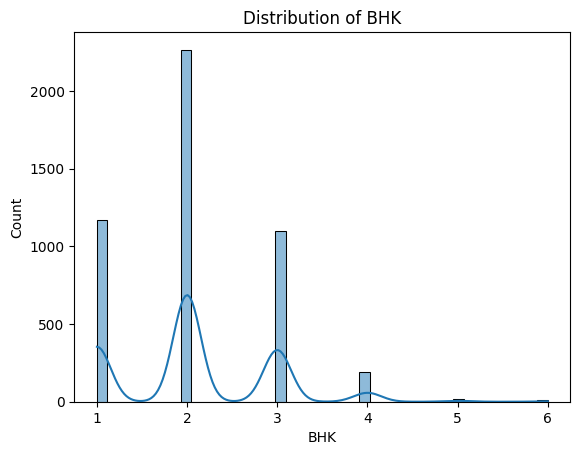

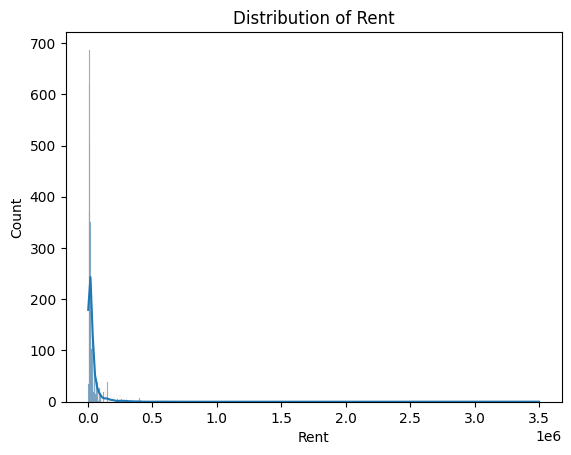

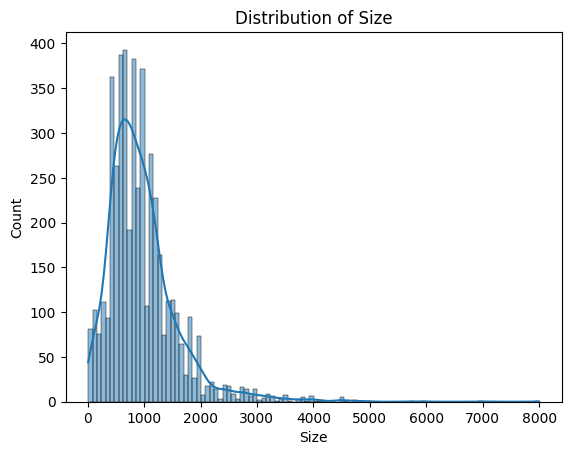

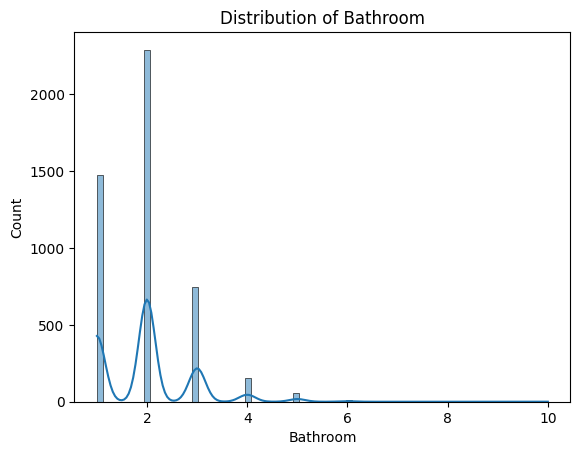

In [ ]:
# Візуалізація розподілу орендної плати

num_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
for col in num_cols:
    sns.histplot(rent_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Висновки:

Найбільші пропозиції:

2 кімнатні апартаменти (1 кімнатні);

дешевий сегмент житла

розмір - 500-700

з 2 ванними кімнатами (1 ванною кімнатою)

In [ ]:
# Перетворення "Posted On" у datetime і виділення року та місяця
rent_df['Posted On'] = pd.to_datetime(rent_df['Posted On'], errors='coerce')
rent_df['Posted Year'] = rent_df['Posted On'].dt.year
rent_df['Posted Month'] = rent_df['Posted On'].dt.month
rent_df.drop(columns='Posted On', inplace=True)

# Обробка колонки "Floor"
def extract_floor_info(floor_str):
    try:
        floor_str = floor_str.strip()
        if 'Ground' in floor_str:
            return 0, int(floor_str.split('out of')[-1])
        elif 'Upper Basement' in floor_str:
            return -1, int(floor_str.split('out of')[-1])
        elif 'Lower Basement' in floor_str:
            return -2, int(floor_str.split('out of')[-1])
        elif 'out of' in floor_str:
            parts = floor_str.split(' out of ')
            return int(parts[0]), int(parts[1])
        else:
            return np.nan, np.nan
    except:
        return np.nan, np.nan

rent_df[['Floor_Level', 'Total_Floors']] = rent_df['Floor'].apply(lambda x: pd.Series(extract_floor_info(str(x))))
rent_df.dropna(subset=['Floor_Level', 'Total_Floors'], inplace=True)
rent_df.drop(columns='Floor', inplace=True)

# Обробка Area Locality
top_localities = rent_df['Area Locality'].value_counts().nlargest(10).index
rent_df['Area Locality'] = rent_df['Area Locality'].apply(lambda x: x if x in top_localities else 'Other')

# Для всіх категоріальних змінних краще використати One-Hot Encoding, наприклад:
categorical_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'Area Locality']
rent_df = pd.get_dummies(rent_df, columns=categorical_cols, drop_first=True)

# Висновки:

Дати перетворено

Floor — розбито на числові ознаки

Бінарні/категоріальні змінні — підготовлено для кодування

Дані готові до нормалізації/моделювання

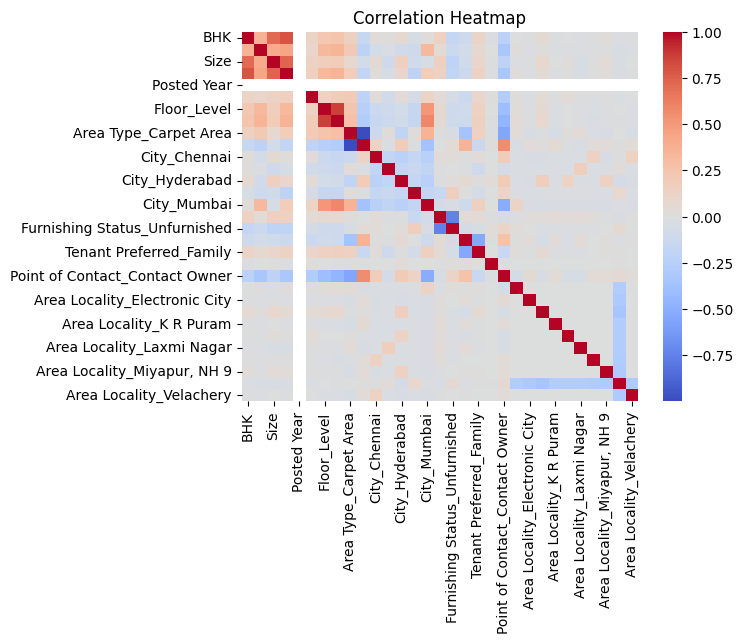

In [ ]:
# Кореляційна матриця

corr = rent_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Висновок:

Показує наскільки зміна однієї змінної пов’язана зі зміною іншої:
+1.0 — ідеальна пряма залежність

-1.0 — ідеальна обернена залежність

0 — немає лінійної залежності

## Rent найбільш позитивно корелює з:

Size (розмір квартири)

Bathroom (кількість ванних кімнат)

BHK (кількість спалень)

## Rent слабо або майже не корелює з:
Total_Floors чи Floor_Level (етажність), хоча іноді може бути значущим у великих містах.

Posted Month.

Якщо є однакові ознаки (наприклад, Size і BHK часто йдуть разом), то між ними буде також висока кореляція → може бути мультиколінеарність (для лінійних моделей це погано).

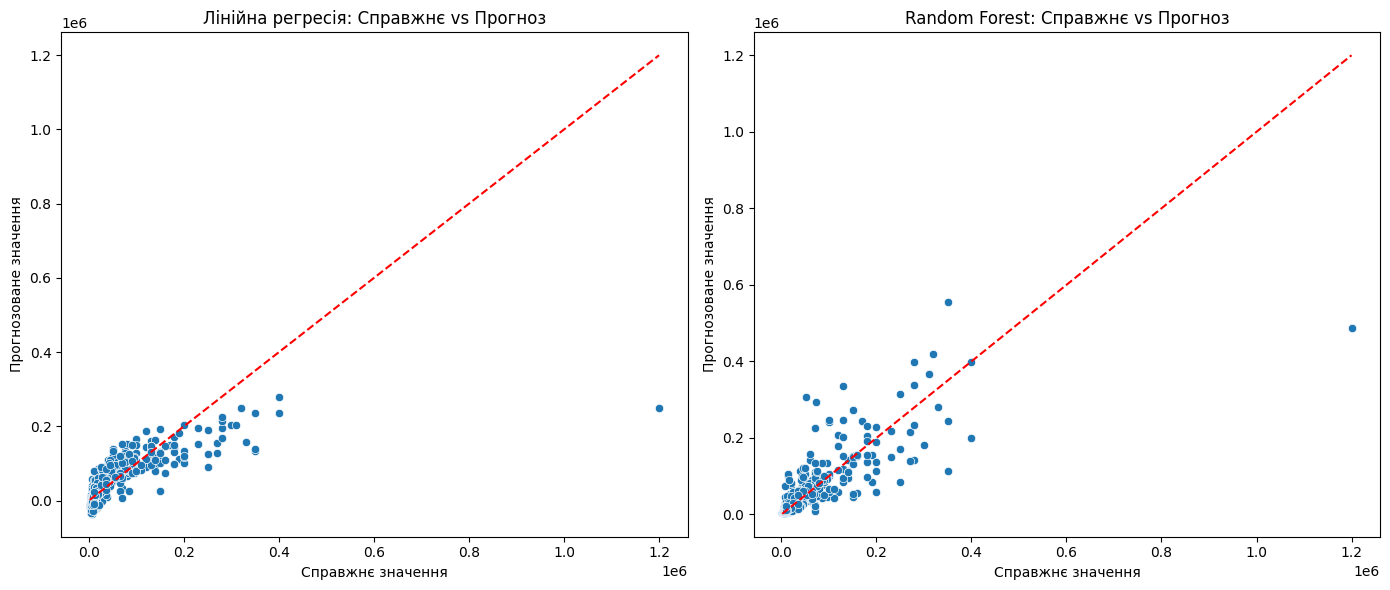

Лінійна регресія:
MSE: 1847380849.03
R²: 0.5501
Random Forest:
MSE: 1417235287.44
R²: 0.6548


In [ ]:
# Моделювання.

# Формування X та y
X = rent_df.drop(columns=['Rent'])
y = rent_df['Rent']

# Розділення та масштабування
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель 1: Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test, y_pred_lin) # середнє квадратичне відхилення
r2_lin = r2_score(y_test, y_pred_lin) # коефіцієнт детермінації

# Модель 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)  # середнє квадратичне відхилення
r2_rf = r2_score(y_test, y_pred_rf) # коефіцієнт детермінації

# Візуалізація
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Лінійна регресія: Справжнє vs Прогноз')
plt.xlabel("Справжнє значення")
plt.ylabel("Прогнозоване значення")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Справжнє vs Прогноз')
plt.xlabel("Справжнє значення")
plt.ylabel("Прогнозоване значення")

plt.tight_layout()
plt.show()

# Метрики
print("Лінійна регресія:")
print(f"MSE: {mse_lin:.2f}")
print(f"R²: {r2_lin:.4f}")

print("Random Forest:")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

# Висновки:

##  Mean Squared Error (MSE)
MSE — це середнє квадратичне відхилення між справжніми та передбаченими значеннями:

Чим менше MSE, тим точніший прогноз.

Вимірюється у квадратних одиницях цільової змінної (грошах).

### Модель	MSE (менше — краще)

Лінійна регресія	1,847,380,849

Random Forest	1,417,235,287

Random Forest точніше прогнозує орендну плату, має менше середнє відхилення.

## R² (Коефіцієнт детермінації)
Показує, яка частка варіації цільової змінної пояснюється моделлю.

Значення від 0 до 1 (іноді може бути від’ємним при дуже поганій моделі):

0 — модель нічого не пояснює

1 — модель повністю пояснює дані

більше 0.5 — прийнятна модель

### Модель	R² (більше — краще)
Лінійна регресія	0.5501

Random Forest	0.6548

Random Forest краще "вловлює" залежності між ознаками і рентою.


Лінійна регресія — дуже проста модель, яка передбачає лише лінійні зв'язки. Вона може бути недоцільною для складних взаємозалежностей між ознаками (наприклад, нелінійний вплив площі, поверху, типу меблів тощо).

Random Forest — ансамблева модель, яка враховує взаємодії між ознаками та нелінійні залежності, і тому дає кращий результат.


## Якість
Random Forest точніший за всіма метриками.
## Складність
Random Forest складніший у навчанні.
## Інтерпретованість
Лінійна регресія простіша для пояснення.

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



 VIF (Multicollinearity):
                              Feature         VIF
7               Area Type_Carpet Area  951.383165
8                Area Type_Super Area  950.221101
28                Area Locality_Other    6.187959
6                        Total_Floors    4.521784
2                            Bathroom    3.992235
5                         Floor_Level    3.828733
0                                 BHK    3.251835
1                                Size    2.843060
13                        City_Mumbai    2.818641
15      Furnishing Status_Unfurnished    2.426843
14   Furnishing Status_Semi-Furnished    2.381006
19     Point of Contact_Contact Owner    2.161551
22           Area Locality_Gachibowli    1.831549
11                     City_Hyderabad    1.793367
9                        City_Chennai    1.751579
16  Tenant Preferred_Bachelors/Family    1.685747
27        Area Locality_Miyapur, NH 9    1.682836
29            Area Locality_Velachery    1.678884
20              Area Lo

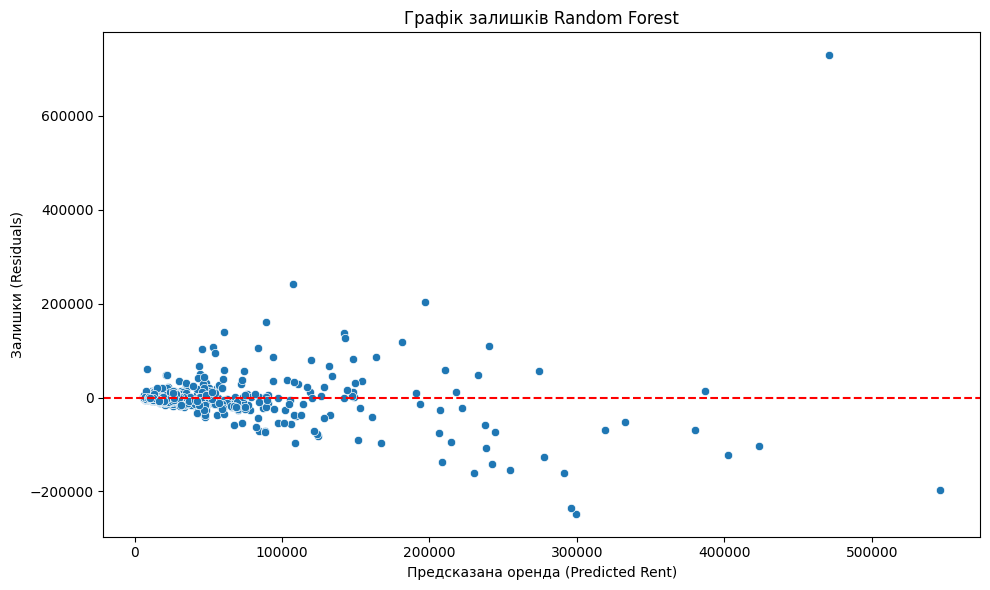

In [ ]:
# --- VIF (Multicollinearity)
X_const = add_constant(X_train_scaled)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const, i+1) for i in range(X.shape[1])]
print("\n VIF (Multicollinearity):")
print(vif_data.sort_values(by='VIF', ascending=False))

# --- GridSearch for RandomForest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("\n Найкращі параметри RandomForest:")
print(grid_search.best_params_)

# --- Feature Importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Топ-10 важливих ознак:")
print(feature_importance.head(10))

# --- Residual Plot
y_pred = best_rf.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказана оренда (Predicted Rent)")
plt.ylabel("Залишки (Residuals)")
plt.title("Графік залишків Random Forest")
plt.tight_layout()
plt.show()

# Висновки по Random Forest:
## Інтерпретація
###Залишки випадкові
Модель добре вловлює залежності
###Немає трендів
Немає ознак недообучення, перекосів
###Помилки на крайніх значеннях
Часто трапляється, тому що Random Forest обмежує екстраполяцію

### Спостереження з  графіка:
На середніх і нижчих значеннях оренди — помилки мінімальні.

На дуже дорогих квартирах — помилки більші, модель недооцінює їх (часто через обмеження глибини дерева та впливу меншості даних).

## Мультиколінеарність (Variance Inflation Factor)

VIF показує, наскільки одна ознака залежить від інших ознак.

Якщо VIF > 5 (або 10), це ознака мультиколінеарності — тобто ознака надто сильно корелює з іншими i може заважати моделі.

В нашому прикладі це параметри розташування апартеаментів (Area)

### VIF Інтерпретація:

~1	Ознака незалежна від інших

1–5	Слабка мультиколінеарність

більше 5 або більше 10	Сильна мультиколінеарність

#### Висновок:
Якщо ознак з VIF > 10 кілька — варто або видалити, або об'єднати, або зменшити через PCA.

### Важливість ознак (Feature Importance)

Random Forest автоматично оцінює, які ознаки найсильніше впливають на цільову змінну (Rent).

Розраховується у відсотках від впливу на рішення дерева.

Найвпливовіші ознаки можна залишити в моделі (для спрощення та інтерпретації).

Малозначущі — видалити або зменшити для уникнення "шуму".

### Tоп-ознаки:

Size (розмір площі)

BHK (кількість кімнат)

Bathroom (кількість ванних кімнат)

Floor_Level (поверх)

City_<> (місто)

### Графік залишків (Residuals Plot)

Відображає якість передбачень.

Залишки = Справжні значення мінус Прогноз.

Ідеально: залишки розподілені випадково навколо 0.


## Рівномірне розсіювання
Модель адекватна
## Віялоподібна структура
Варіація не константна (гетероскедастичність)
## Систематичний малюнок
Можна перевірити значення, які виходять за рамки стандартної поваедінки
